In [22]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

df = pd.read_csv("G:\\programmation\\WildCodeSchool\\Formation_IA_DATA_nov2023\\quêtes\\Semaine3\\live_coding\\Base_de_données_et_SQL\\Data_Immo.csv",
                 sep=";", header=0, skiprows=1,encoding='ISO-8859-1')
# header=0 pour indiquer que la deuxiéme ligne contient les entetes
#  sep=";"pour indiquer que le séparateur est un ; et non  ,
#  pour eviter l'erreur d'encodage encoding='ISO-8859-1'
#  skiprows=1  pour eviter la premiere ligne qui dans notre cas contient des infos inutiles

C:\Users\romar\AppData\Local\Temp\ipykernel_7500\1344169189.py:5: DtypeWarning: Columns (20,26,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("G:\\programmation\\WildCodeSchool\\Formation_IA_DATA_nov2023\\quêtes\\Semaine3\\live_coding\\Base_de_données_et_SQL\\Data_Immo.csv",


In [35]:
df.head()  # Affiche les 5 premières lignes du DataFrame

,No disposition,No voie,Code type de voie,Code ID commune,Code postal,Code commune,Prefixe de section,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,1.0,NaN,0.0,0,1370.0,350.0,736.810149,NaN,1.0,2.0,52.0,2.0,355.529644
1,1.0,NaN,0.0,1,1170.0,103.0,736.810149,302.0,2.0,2.0,48.0,3.0,355.529644
2,1.0,58.0,1.0,2,1220.0,143.0,736.810149,563.0,2.0,2.0,NaN,NaN,355.529644
3,1.0,NaN,0.0,3,1630.0,288.0,736.810149,NaN,1.0,NaN,109.0,NaN,355.529644
4,1.0,39.0,0.0,4,1200.0,33.0,736.810149,440.0,2.0,2.0,91.0,4.0,355.529644


In [24]:
print(df.shape)

(34169, 45)


In [25]:
df.info()  # Affiche un résumé concis du DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34169 entries, 0 to 34168
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Code service CH             0 non-null      float64
 1   Reference document          0 non-null      float64
 2   1 Articles CGI              0 non-null      float64
 3   2 Articles CGI              0 non-null      float64
 4   3 Articles CGI              0 non-null      float64
 5   4 Articles CGI              0 non-null      float64
 6   5 Articles CGI              0 non-null      float64
 7   No disposition              34169 non-null  int64  
 8   Date mutation               34169 non-null  object 
 9   Nature mutation             34169 non-null  object 
 10  Valeur fonciere             34151 non-null  object 
 11  No voie                     34036 non-null  float64
 12  B/T/Q                       2174 non-null   object 
 13  Code type de voie           341

In [38]:
df.describe()  # Affiche des statistiques descriptives du DataFrame

,No disposition,No voie,Code type de voie,Code ID commune,Code postal,Code commune,Prefixe de section,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain
count,34093.0,29204.000000,27635.000000,34169.000000,34169.000000,32768.000000,3.302600e+04,31338.00000,33810.000000,31378.0,33345.000000,31952.000000,33916.000000
mean,1.0,28.020408,0.524154,2009.368931,62089.903243,170.664734,7.368101e+02,180.18977,1.361520,2.0,54.147039,2.433025,355.529644
std,0.0,29.630609,1.073620,1051.410563,28259.245358,140.556396,1.136886e-13,170.80615,0.543207,0.0,24.497569,1.008751,0.000000
min,1.0,1.000000,0.000000,0.000000,1090.000000,1.000000,7.368101e+02,1.00000,1.000000,2.0,1.000000,1.000000,355.529644
25%,1.0,6.000000,0.000000,1054.000000,38000.000000,64.000000,7.368101e+02,46.00000,1.000000,2.0,35.000000,2.000000,355.529644
50%,1.0,17.000000,0.000000,2288.000000,75008.000000,118.000000,7.368101e+02,121.00000,1.000000,2.0,52.000000,2.000000,355.529644
75%,1.0,39.000000,1.000000,3011.000000,83610.000000,243.000000,7.368101e+02,268.00000,2.000000,2.0,70.000000,3.000000,355.529644
max,1.0,132.000000,5.000000,3214.000000,97490.000000,563.000000,7.368101e+02,721.00000,3.000000,2.0,125.000000,4.000000,355.529644


In [39]:
#  un résumé du contenu d’une colonne dans un DataFrame
nom_de_la_colonne="Surface reelle bati"
print(df[nom_de_la_colonne].describe())


count    33345.000000
mean        54.147039
std         24.497569
min          1.000000
25%         35.000000
50%         52.000000
75%         70.000000
max        125.000000
Name: Surface reelle bati, dtype: float64


In [36]:
# vérifie si toutes les valeurs d’une colonne sont manquantes (NaN).
colonnes_vides = df.columns[df.isnull().all()]
colonnes_vides
# autre solutions  vérifie si toutes les valeurs d’une colonne sont des chaînes vides ou des espaces.
# colonnes_vides = df.columns[(df == '' | df.isspace()).all()]


Index([], dtype='object')

In [27]:
# suppression des colonnes vides
df = df.drop(colonnes_vides, axis=1)
print(df.shape)


(34169, 28)


In [32]:
# Voir les valeurs manquantes :
df.isnull().sum()

No disposition                 76
No voie                      4965
Code type de voie            6534
Code ID commune                 0
Code postal                     0
Code commune                 1401
Prefixe de section           1143
No plan                      2831
Nombre de lots                359
Code type local              2791
Surface reelle bati           824
Nombre pieces principales    2217
Surface terrain               253
dtype: int64

In [21]:
# supprime les lignes contenant des valeurs manquantes,
nom_de_la_colonne="Valeur fonciere"
df = df.dropna()
print(df.shape)

(0, 28)


In [ ]:
# remplacer les valeurs manquantes par une valeur spécifique (par exemple, 0)
df = df.fillna(0)
print(df.shape)

In [ ]:
# Calculer le z-score pour chaque colonne
df_zscore = df.apply(zscore)

# Remplacer les valeurs manquantes par le z-score
df_filled = df.fillna(df_zscore)
print(df.shape)



TRAITEMENT DES VALEURS ABERRANTES

In [30]:
# La règle de l’écart interquartile (IQR) : Cette méthode, également connue sous le nom de règle de Tukey, consiste à calculer l’IQR (Q3 - Q1) de vos données. Ensuite, vous déterminez vos limites pour les valeurs aberrantes avec l’IQR. La limite inférieure est calculée comme Q1 - 1,5 * IQR et la limite supérieure comme Q3 + 1,5 * IQR. Les données en dehors de ces limites sont considérées comme des valeurs aberrantes1.
#  calcul des quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# applique la fonction zscore à chaque colonne de votre DataFrame df en utilisant la méthode apply(). Le résultat est un nouveau DataFrame df_zscore où chaque valeur a été remplacée par son score z.
filtre = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
#  remplace toutes les valeurs aberrantes dans votre DataFrame original df par np.nan, qui représente une valeur manquante ou non définie en Python.
df[filtre] = np.nan

In [33]:
df.info()  # Affiche un résumé concis du DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34169 entries, 0 to 34168
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No disposition             34093 non-null  float64
 1   No voie                    29204 non-null  float64
 2   Code type de voie          27635 non-null  float64
 3   Code ID commune            34169 non-null  int64  
 4   Code postal                34169 non-null  float64
 5   Code commune               32768 non-null  float64
 6   Prefixe de section         33026 non-null  float64
 7   No plan                    31338 non-null  float64
 8   Nombre de lots             33810 non-null  float64
 9   Code type local            31378 non-null  float64
 10  Surface reelle bati        33345 non-null  float64
 11  Nombre pieces principales  31952 non-null  float64
 12  Surface terrain            33916 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 3.4 MB


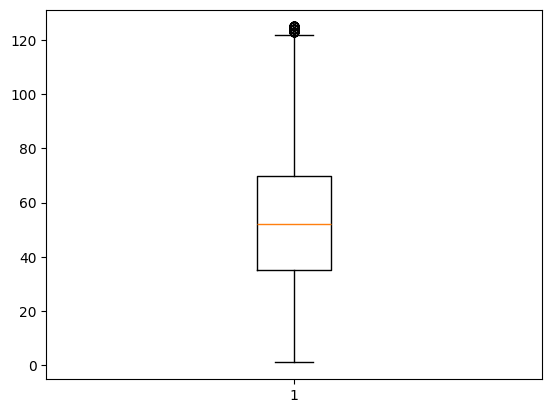

In [41]:
# Boîtes à moustaches (Boxplots) : Les boîtes à moustaches sont un excellent moyen de visualiser les valeurs aberrantes. Les “moustaches” du graphique indiquent la plage dans laquelle se trouvent la plupart des données, et les points en dehors de cette plage sont souvent considérés comme des valeurs aberrantes2.
import matplotlib.pyplot as plt

nom_de_la_colonne="Surface reelle bati"
plt.boxplot(df[nom_de_la_colonne].dropna())
plt.show()

In [28]:

# Z-score : Le z-score est une mesure qui indique combien de fois l’écart-type une valeur est éloignée de la moyenne. Les valeurs avec un z-score très élevé ou très faible (par exemple, plus de 3 ou moins de -3) sont souvent considérées comme des valeurs aberrantes1.

# avant de faire le z-scrore il faut faire un peu de nettoyage

# Sélectionner uniquement les colonnes numériques
df_numerique = df.select_dtypes(include=[np.number])

# Calculer la moyenne pour chaque colonne numérique
moyenne = df_numerique.mean()

# Remplacer les valeurs manquantes par la moyenne
df = df.fillna(moyenne)


# Exclure les colonnes non numériques
df = df.select_dtypes(include=[np.number])

# Appliquer la fonction zscore
df_zscore = df.apply(zscore)

# calcul du z-score

from scipy.stats import zscore
df_zscore = df.apply(zscore)
filtre = (df_zscore < -3) | (df_zscore > 3)
df[filtre] = np.nan

# TRAITEMENT DE TOUTES LES COLONNES POUR CONNAITRES CELLES QUI ONT LE PLUS DE VALEURS ABERRANTES
# Calculer le score z pour chaque colonne
df_zscore = df.apply(zscore)

# Identifier les valeurs aberrantes
filtre = (df_zscore < -3) | (df_zscore > 3)

# Compter le nombre de valeurs aberrantes dans chaque colonne
nombre_aberrantes = filtre.sum()

# Afficher le nombre de valeurs aberrantes pour chaque colonne
print(nombre_aberrantes)

No disposition               0
No voie                      0
Code type de voie            0
Code ID commune              0
Code postal                  0
Code commune                 0
Prefixe de section           0
No plan                      0
Nombre de lots               0
Code type local              0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
dtype: int64


In [ ]:

# Méthode de la distance de Cook : Cette méthode est souvent utilisée en régression pour identifier les valeurs aberrantes qui ont une grande influence sur l’ajustement du modèle2.
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]
seuil = 4 / (len(y) - X.shape[1] - 1)
filtre = cooks_distance > seuil
df[filtre] = np.nan

In [ ]:
# FORMATAGE DES DONNEES

In [ ]:
# formate les prix en € par ex 56000 -> 56 000€ l
# La fonction lambda prend chaque valeur dans la colonne, la formate avec des espaces comme séparateurs de milliers et ajoute le symbole ‘€’ à la fin. Le résultat est une colonne où chaque cellule a le format que vous voulez.
#  rajoute un espace et le symbole €
nom_de_la_colonne="Surface reelle bati"
df[nom_de_la_colonne] = df[nom_de_la_colonne].apply(lambda x: f'{x:,} €'.replace(',', ' '))